目前使用LOP為定義之實驗數據採用54筆，單變數

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import preprocessing as pre
from scipy import stats
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

In [2]:
# TIP = pd.read_csv(os.path.join("/root/LR_ML", "0507.xlsx"))
# TIP = pd.read_excel('0507.xlsx', index_col=None)
# TIP = pd.read_csv(os.path.join('/root/LR_ML', 'Data_Sorted.csv'), error_bad_lines=False)
# os.getcwd()

In [3]:
datafile = u"/root/LR_ML/FinalData000.xlsx"
TIP0 = pd.read_excel(datafile)

In [4]:
TIP = pd.DataFrame(TIP0).drop(['No pulse', 'LOP error'],axis=1)

In [5]:
# TIP.head()

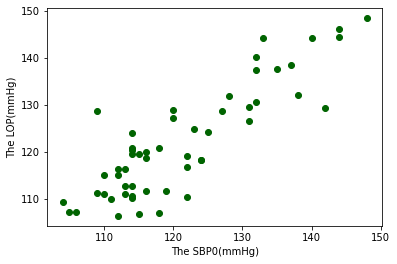

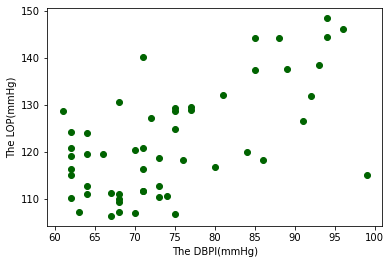

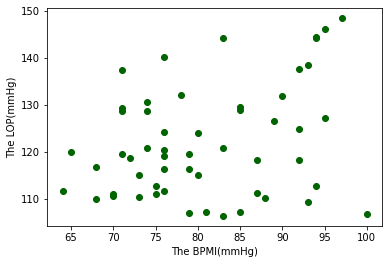

In [6]:
modTIP = TIP
#繪製散點圖,examDf.jt爲X軸，examDf.hk爲Y軸
plt.scatter(modTIP.SBP0,modTIP.LOP,color = 'darkgreen',label = "Exam Data")
#添加圖的標籤（x軸，y軸）
plt.xlabel("The SBP0(mmHg)")#設置X軸標籤
plt.ylabel("The LOP(mmHg)")#設置Y軸標籤
plt.show()#顯示圖像

plt.scatter(modTIP.DBP0,modTIP.LOP,color = 'darkgreen',label = "Exam Data")
plt.xlabel("The DBPI(mmHg)")#設置X軸標籤
plt.ylabel("The LOP(mmHg)")#設置Y軸標籤
plt.show()#顯示圖像

plt.scatter(modTIP.BPM0,modTIP.LOP,color = 'darkgreen',label = "Exam Data")
plt.xlabel("The BPMI(mmHg)")#設置X軸標籤
plt.ylabel("The LOP(mmHg)")#設置Y軸標籤
plt.show()#顯示圖像

             SBP0       DBP0       BPM0         LOP
count   54.000000  54.000000   54.00000   54.000000
mean   121.222222  74.425926   80.87037  122.059259
std     11.082311  10.525086    9.33455   11.709140
min    104.000000  61.000000   64.00000  106.400000
25%    113.250000  67.000000   74.00000  111.800000
50%    118.000000  71.500000   79.00000  119.600000
75%    130.250000  80.750000   88.75000  129.200000
max    148.000000  99.000000  100.00000  148.400000
          SBP0      DBP0      BPM0       LOP
SBP0  1.000000  0.672252  0.316183  0.862782
DBP0  0.672252  1.000000  0.445735  0.616598
BPM0  0.316183  0.445735  1.000000  0.311903
LOP   0.862782  0.616598  0.311903  1.000000


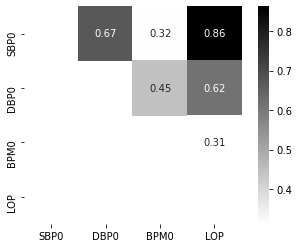

In [7]:
print(modTIP.describe())
rDf = modTIP.corr()#查看數據間的相關係數
print(rDf)

matrix = np.tril(rDf)
H = sns.heatmap(modTIP.corr(),annot=True, cmap="gray_r", square=True, mask=matrix)
F = H.get_figure()
# F.savefig('heatmap_colored_correlation_matrix_seaborn_python.png')

In [8]:
def t_test(group1, group2):
    mean1 = np.mean(group1)
    mean2 = np.mean(group2)
    std1 = np.std(group1)
    std2 = np.std(group2)
    nobs1 = len(group1)
    nobs2 = len(group2)
    
    modified_std1 = np.sqrt(np.float32(nobs1)/
                    np.float32(nobs1-1)) * std1
    modified_std2 = np.sqrt(np.float32(nobs2)/
                    np.float32(nobs2-1)) * std2
    (statistic, pvalue) = stats.ttest_ind_from_stats( 
               mean1=mean1, std1=modified_std1, nobs1=nobs1,   
               mean2=mean2, std2=modified_std2, nobs2=nobs2 )
    return statistic, pvalue

In [9]:
print(t_test(modTIP.SBP0, modTIP.LOP))

print(t_test(modTIP.DBP0, modTIP.LOP))

print(t_test(modTIP.BPM0, modTIP.LOP))

print(t_test(modTIP.LOP, modTIP.LOP))

(-0.3815227030190968, 0.7035791276284683)
(-22.23237636786993, 1.0425717945422275e-41)
(-20.212617266922827, 3.739989590304645e-38)
(0.0, 1.0)


MAE: 4.948094787365034
最佳擬合線: LOP =  [15.33] + [0.88] * SBP0
R squared: 0.5771688034188025
MAE: 4.291757422140293
最佳擬合線: LOP =  [12.38] + [0.9] * SBP0
R squared: 0.6057578057241984
MAE: 3.9100203456865175
最佳擬合線: LOP =  [14.79] + [0.89] * SBP0
R squared: 0.8981259097525474
MAE: 3.6304364919883274
最佳擬合線: LOP =  [13.05] + [0.9] * SBP0
R squared: 0.8388826514918488
MAE: 7.009666816849636
最佳擬合線: LOP =  [2.14] + [0.99] * SBP0
R squared: 0.40790964503406196
5-fold Mean MAE: 4.757995172805961


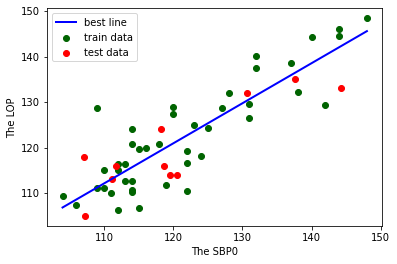

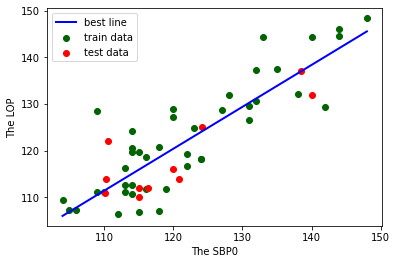

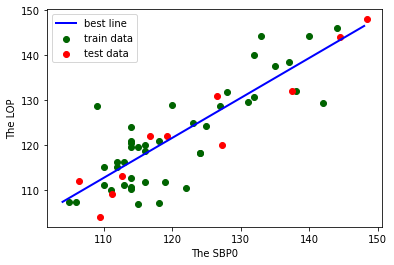

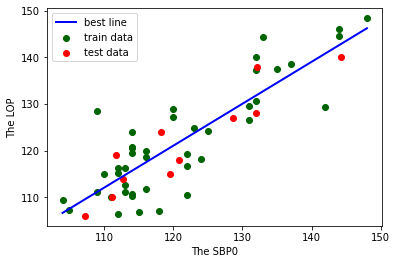

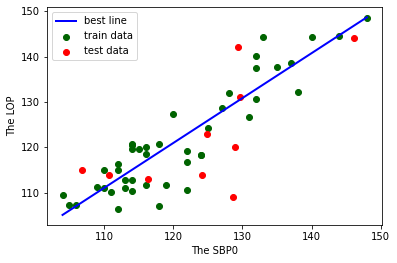

In [21]:
XX=modTIP.SBP0
YY=modTIP.LOP
qqq=np.array(XX)
qqq = np.reshape(qqq, (54,1))
qqqq=np.array(YY)
qqqq = np.reshape(qqqq, (54,1))
# cross_val_score(model, qqq, qqqq, cv=2)
# lr=LinearRegression()

# predicted = cross_val_predict(lr, qqq, qqqq, cv=9)
# fig, ax = plt.subplots()
# ax.scatter(qqqq, predicted)
# ax.plot([qqqq.min(), qqqq.max()], [qqqq.min(), qqqq.max()], 'k--', lw=4)
# ax.set_xlabel('Measured')
# ax.set_ylabel('Predicted')
# plt.show()
# seed = 7
kfold = model_selection.KFold(n_splits=5, shuffle=False)
s = []
for train, validate in kfold.split(qqq, qqqq):
    lrr = LinearRegression()
    lrr.fit(qqq[train], qqqq[train])
    #qqqq[validate]是ground truth
    #qqq[validate]是x_test
    s.append(mean_absolute_error(qqqq[validate], lrr.predict(qqq[validate])))
    print("MAE:",mean_absolute_error(qqqq[validate], lrr.predict(qqq[validate])))
    plt.figure()
    a=lrr.intercept_
    b=lrr.coef_
    X1=np.linspace(qqq.min(),qqq.max(),52)
    Y1=np.round(a,2) + np.round(b[0],2) * X1
    print("最佳擬合線: LOP = ",np.round(a,2),"+",np.round(b[0],2),"* SBP0")
    plt.plot(X1, Y1, color='blue', linewidth=2, label="best line")
    plt.scatter(qqq[train], qqqq[train], color='darkgreen', label="train data")
    plt.scatter(qqqq[validate], qqq[validate], color='red', label="test data")
    plt.legend(loc=2)
    plt.xlabel("The SBP0")
    plt.ylabel("The LOP")
    print("R squared:",lrr.score(qqqq[validate],lrr.predict(qqq[validate])))#噴三個 R score
print("5-fold Mean MAE:",np.mean(s))#mse mean
# scoring = 'neg_mean_absolute_error'
# results = model_selection.cross_val_score(lrr, qqq, qqqq, cv=kfold, scoring=scoring)
# print("負的MAE",results.mean())

In [11]:
# print(predicted)

自變量---源數據: (54,) ；  訓練集: (43,) ；  測試集: (11,)
因變量---源數據: (54,) ；  訓練集: (43,) ；  測試集: (11,)


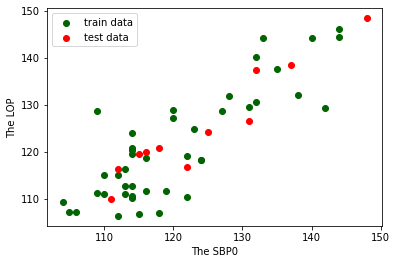

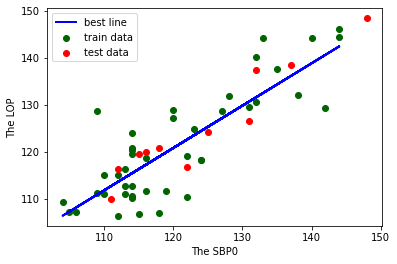

擬合參數:截距 12.83243804904238 ,迴歸係數： [0.89994307]
最佳擬合線: LOP =  12.83 + 0.9 * SBP0
0.7022290226630489
3.165893754118213


In [12]:
#拆分訓練集和測試集（train_test_split是存在與sklearn中的函數）
X_train,X_test,Y_train,Y_test = train_test_split(modTIP.SBP0,modTIP.LOP,train_size=0.8)#,random_state=1
#train爲訓練數據,test爲測試數據,examDf爲源數據,train_size 規定了訓練數據的佔比
print("自變量---源數據:",modTIP.SBP0.shape, "；  訓練集:",X_train.shape, "；  測試集:",X_test.shape)
print("因變量---源數據:",modTIP.LOP.shape, "；  訓練集:",Y_train.shape, "；  測試集:",Y_test.shape)
#散點圖
plt.scatter(X_train, Y_train, color="darkgreen", label="train data")#訓練集爲深綠色點
plt.scatter(X_test, Y_test, color="red", label="test data")#測試集爲紅色點
#添加標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The SBP0")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示散點圖

q = np.array(X_train)#q原先shape是(28,0)
np.shape(q)
q = np.reshape(q, (43,1))#reshape換成(28,1)
qq = np.array(X_test)
qq = np.reshape(qq, (11,1))

model = LinearRegression()
model.fit(q,Y_train)#調用線性迴歸包
# model.fit(X_train,Y_train)
a  = model.intercept_#截距
b = model.coef_#迴歸係數
#訓練數據的預測值
y_train = model.predict(q)#看原本線性
y_train_pred = model.predict(qq)#預測y
#繪製最佳擬合線：標籤用的是訓練數據的預測值y_train_pred
plt.plot(q, y_train, color='blue', linewidth=2, label="best line")
#測試數據散點圖
plt.scatter(X_train, Y_train, color='darkgreen', label="train data")
plt.scatter(X_test, Y_test, color='red', label="test data")
#添加圖標標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The SBP0")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示圖像
print("擬合參數:截距",a,",迴歸係數：",b)
print("最佳擬合線: LOP = ",round(a,2),"+",round(b[0],2),"* SBP0")
#顯示線性方程，並限制參數的小數位爲兩位
print(model.score(q,Y_train))#R score
print(mean_absolute_error(Y_test,y_train_pred))

自變量---源數據: (54,) ；  訓練集: (43,) ；  測試集: (11,)
因變量---源數據: (54,) ；  訓練集: (43,) ；  測試集: (11,)


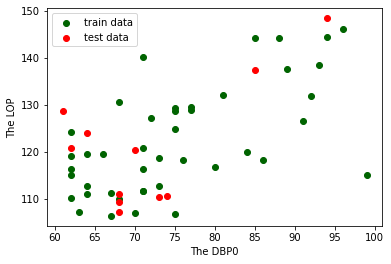

In [13]:
#拆分訓練集和測試集（train_test_split是存在與sklearn中的函數）
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(modTIP.DBP0,modTIP.LOP,train_size=0.8,random_state=1)
#train爲訓練數據,test爲測試數據,examDf爲源數據,train_size 規定了訓練數據的佔比
print("自變量---源數據:",modTIP.DBP0.shape, "；  訓練集:",X_train2.shape, "；  測試集:",X_test2.shape)
print("因變量---源數據:",modTIP.LOP.shape, "；  訓練集:",Y_train2.shape, "；  測試集:",Y_test2.shape)
#散點圖
plt.scatter(X_train2, Y_train2, color="darkgreen", label="train data")#訓練集爲深綠色點
plt.scatter(X_test2, Y_test2, color="red", label="test data")#測試集爲紅色點
#添加標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The DBP0")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示散點圖

自變量---源數據: (54,) ；  訓練集: (43,) ；  測試集: (11,)
因變量---源數據: (54,) ；  訓練集: (43,) ；  測試集: (11,)


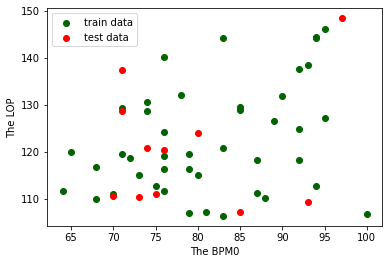

In [14]:
#拆分訓練集和測試集（train_test_split是存在與sklearn中的函數）
X_train3,X_test3,Y_train3,Y_test3 = train_test_split(modTIP.BPM0,modTIP.LOP,train_size=0.8,random_state=1)
#train爲訓練數據,test爲測試數據,examDf爲源數據,train_size 規定了訓練數據的佔比
print("自變量---源數據:",modTIP.BPM0.shape, "；  訓練集:",X_train3.shape, "；  測試集:",X_test3.shape)
print("因變量---源數據:",modTIP.LOP.shape, "；  訓練集:",Y_train3.shape, "；  測試集:",Y_test3.shape)
#散點圖
plt.scatter(X_train3, Y_train3, color="darkgreen", label="train data")#訓練集爲深綠色點
plt.scatter(X_test3, Y_test3, color="red", label="test data")#測試集爲紅色點
#添加標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The BPM0")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示散點圖